In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import os

Using TensorFlow backend.


In [2]:
original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir,'validation')

test_dir = os.path.join(base_dir,'test')

train_cats_dir = os.path.join(train_dir,'cats')

train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')

validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_cats_dir = os.path.join(test_dir,'cats')

test_dogs_dir = os.path.join(test_dir,'dogs')

In [3]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

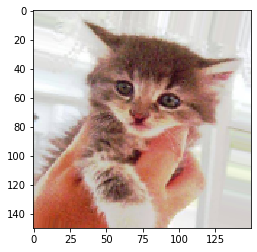

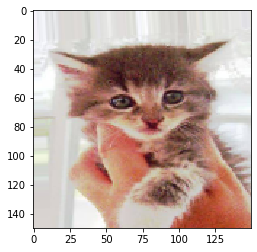

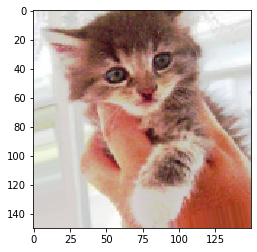

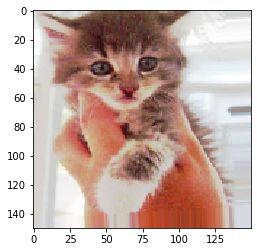

In [4]:
from keras.preprocessing import image
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break
        
plt.show()

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [8]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 63s 633ms/step - loss: 0.6933 - acc: 0.5164 - val_loss: 0.6790 - val_acc: 0.5888
Epoch 2/100
100/100 [==============================] - 65s 649ms/step - loss: 0.6793 - acc: 0.5647 - val_loss: 0.7066 - val_acc: 0.5554
Epoch 3/100
100/100 [==============================] - 66s 655ms/step - loss: 0.6638 - acc: 0.5952 - val_loss: 0.7306 - val_acc: 0.6136
Epoch 4/100
100/100 [==============================] - 65s 649ms/step - loss: 0.6518 - acc: 0.6222 - val_loss: 0.7849 - val_acc: 0.5909
Epoch 5/100
100/100 [==============================] - 63s 629ms/step - loss: 0.6340 - acc: 0.6367 - val_loss: 0.5560 - val_acc: 0.6567
Epoch 6/100
100/100 [==============================] - 67s 669ms/step - loss: 0.6158 - acc: 0.6564 - val_loss: 0.5608 - val_acc: 0.6649
Epoch 7/100
100/100 [==============================] - 64s 636ms/step - loss: 0.6066 - acc: 0.6645 - val_loss: 0.5734 - val_acc: 0.6618
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 69s 686ms/step - loss: 0.4046 - acc: 0.8109 - val_loss: 0.6215 - val_acc: 0.7861
Epoch 62/100
100/100 [==============================] - 68s 676ms/step - loss: 0.3973 - acc: 0.8230 - val_loss: 0.4257 - val_acc: 0.8192
Epoch 63/100
100/100 [==============================] - 66s 656ms/step - loss: 0.4039 - acc: 0.8094 - val_loss: 0.3641 - val_acc: 0.8125
Epoch 64/100
100/100 [==============================] - 74s 744ms/step - loss: 0.3821 - acc: 0.8282 - val_loss: 0.4437 - val_acc: 0.7854
Epoch 65/100
100/100 [==============================] - 68s 685ms/step - loss: 0.3966 - acc: 0.8192 - val_loss: 0.6896 - val_acc: 0.8135
Epoch 66/100
100/100 [==============================] - 72s 722ms/step - loss: 0.3862 - acc: 0.8260 - val_loss: 0.4271 - val_acc: 0.7635
Epoch 67/100
100/100 [==============================] - 69s 686ms/step - loss: 0.3928 - acc: 0.8241 - val_loss: 0.5141 - val_acc: 0.7995
Epoch 68/100
100/100 [===================

In [11]:
model.save('cats_and_dogs_small_2.h5')

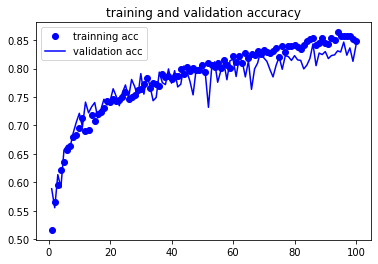

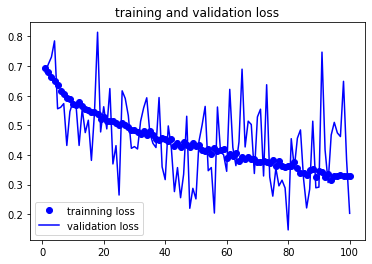

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='trainning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='trainning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()